In [315]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [316]:
## Importing required modules\librearies

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
## Original PIMA Indian dataset

originalDf = pd.read_csv('/content/drive/MyDrive/Notes/Final Year Project/DiabetesDataSet_2.csv')

originalDf.columns = ['preg', 'glu', 'BP', 'skinTh', 'insulin', 'BMI', 'diaPedFun', 'age', 'class']

originalDf

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [318]:
## Function to print countplot bar count

def plotBarCount(x) :
  for p in x.patches:
    x.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+15))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


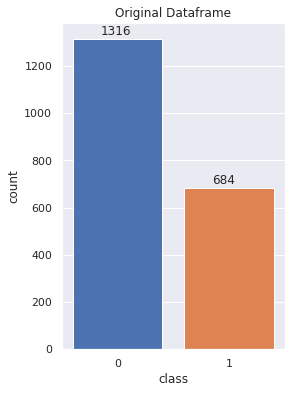

In [319]:
# Number of diabetic and non-diabetic data points in the original dataset

sns.set()

plt.figure(figsize=(4,6))
ax = sns.countplot(originalDf['class'], saturation=1)
plt.title('Original Dataframe')
plotBarCount(ax)

In [320]:
# Number of diabetic and non-diabetic data points in the original dataset

originalDf['class'].value_counts()

0    1316
1     684
Name: class, dtype: int64

In [321]:
## Preparing dataset for clustering and classification

dfCopy = originalDf.copy()
del dfCopy['class']

# Normalizing the data using MminMax scaler
scaler = MinMaxScaler()
scaler.fit(dfCopy)
X_scaled = scaler.transform(dfCopy)

df = pd.DataFrame(X_scaled)
df.columns = ['preg',	'glu',	'BP',	'skinTh',	'insulin',	'BMI',	'diaPedFun',	'age']

df

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000
...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333


In [322]:
df.describe()

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.217853,0.608957,0.566766,0.190318,0.107868,0.399417,0.167775,0.201508
std,0.194474,0.161149,0.157281,0.146393,0.149436,0.101115,0.138152,0.196440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.520492,0.000000,0.000000,0.339640,0.070880,0.050000
50%,0.176471,0.587940,0.590164,0.209091,0.053763,0.400744,0.127242,0.133333
75%,0.352941,0.708543,0.655738,0.290909,0.174731,0.456576,0.233134,0.316667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


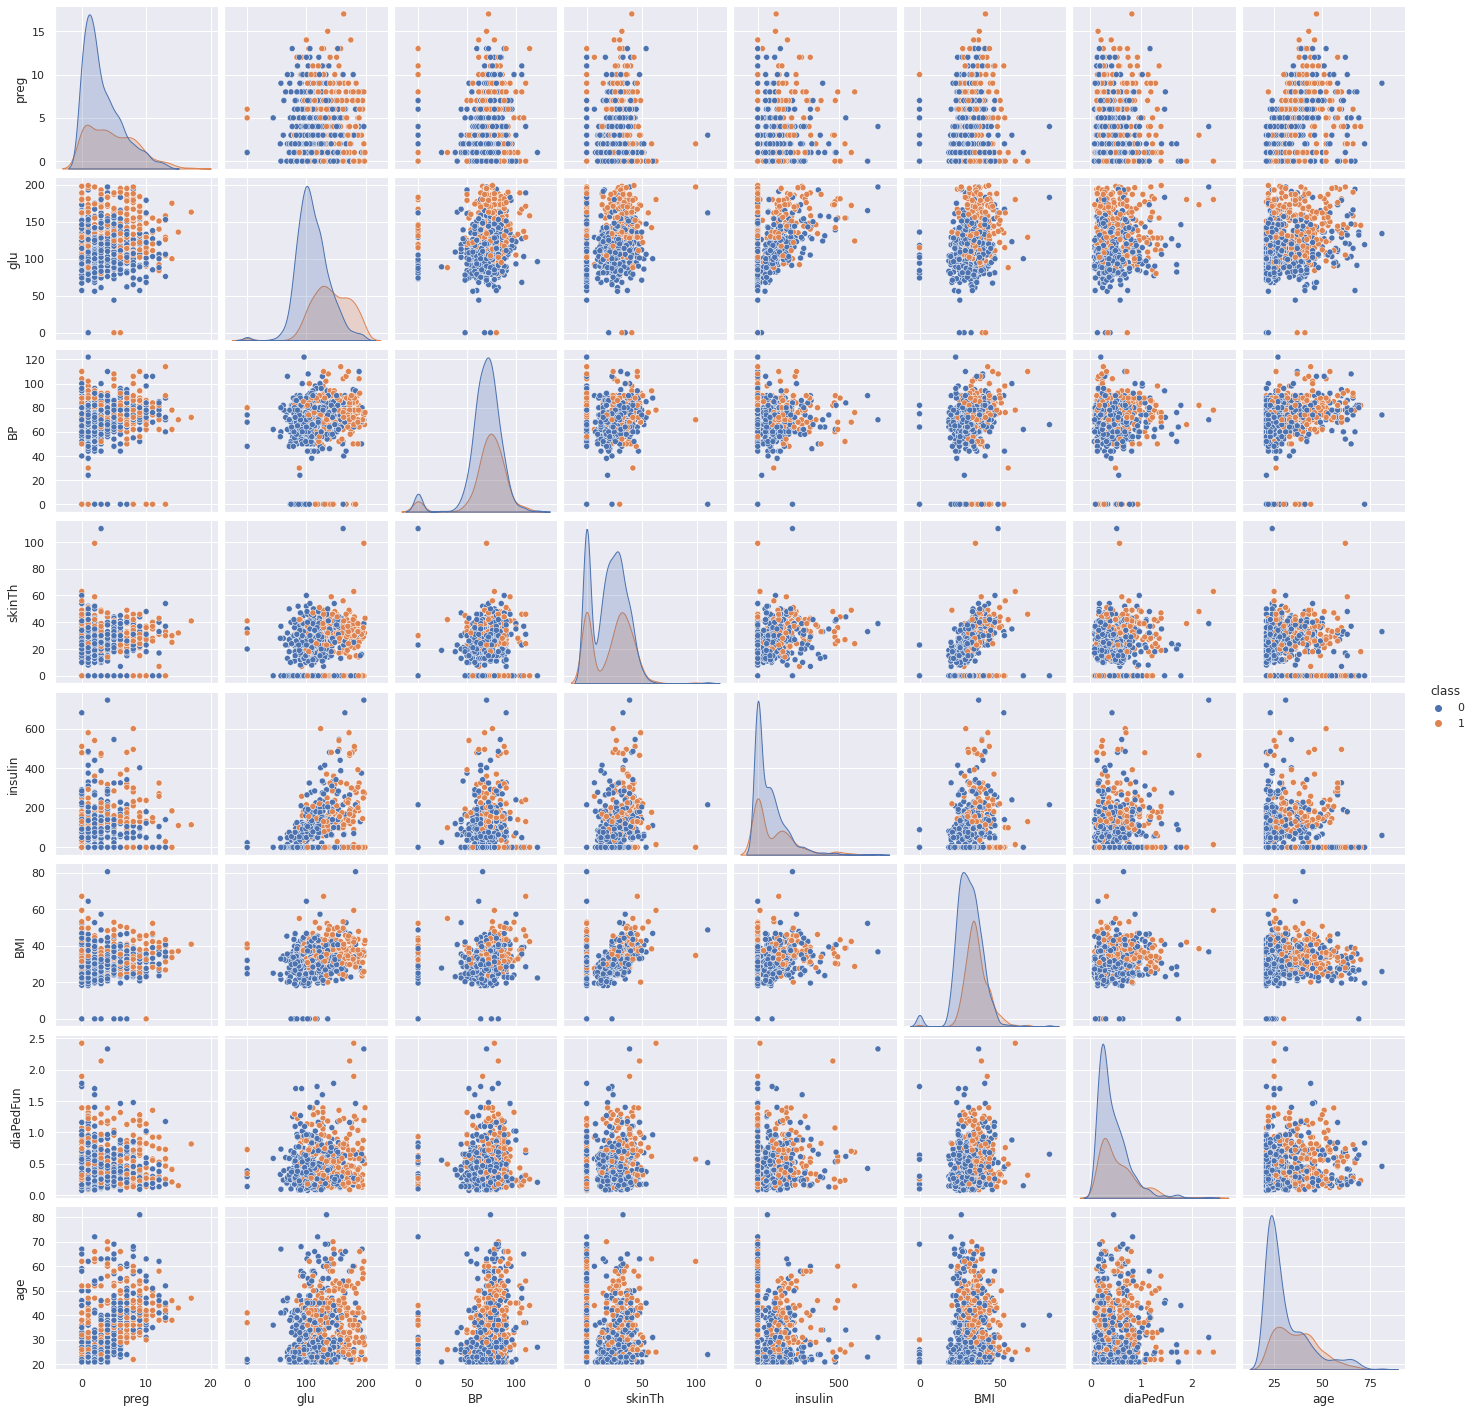

In [323]:
#pairplot to check the distribution of the data

sns.pairplot(data=originalDf, hue='class', diag_kind='kde')
plt.show()

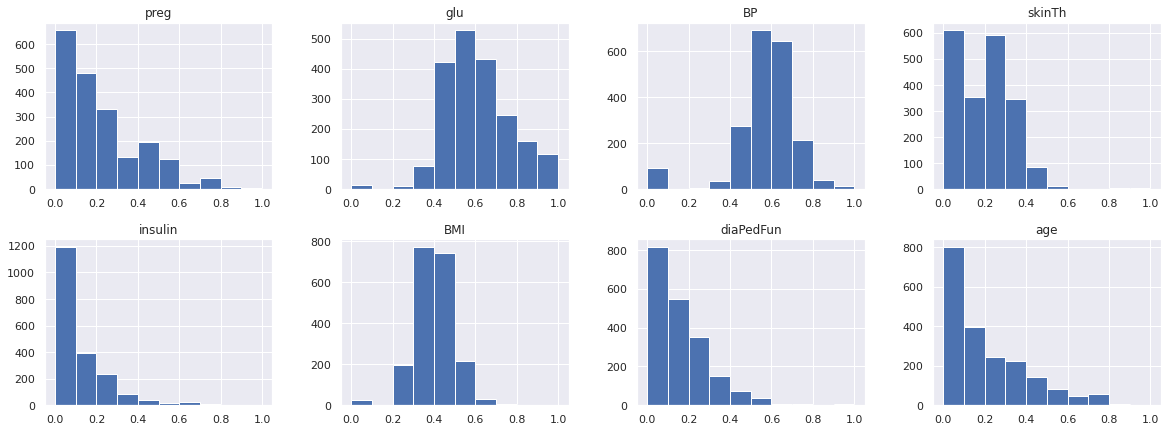

In [324]:
## Plotting a Histogram of the data

df.hist(figsize=(20,15), layout=[4,4])
plt.show()

preg             AxesSubplot(0.125,0.71587;0.168478x0.16413)
glu           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
BP            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
skinTh        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
insulin         AxesSubplot(0.125,0.518913;0.168478x0.16413)
BMI          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
diaPedFun    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
age          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

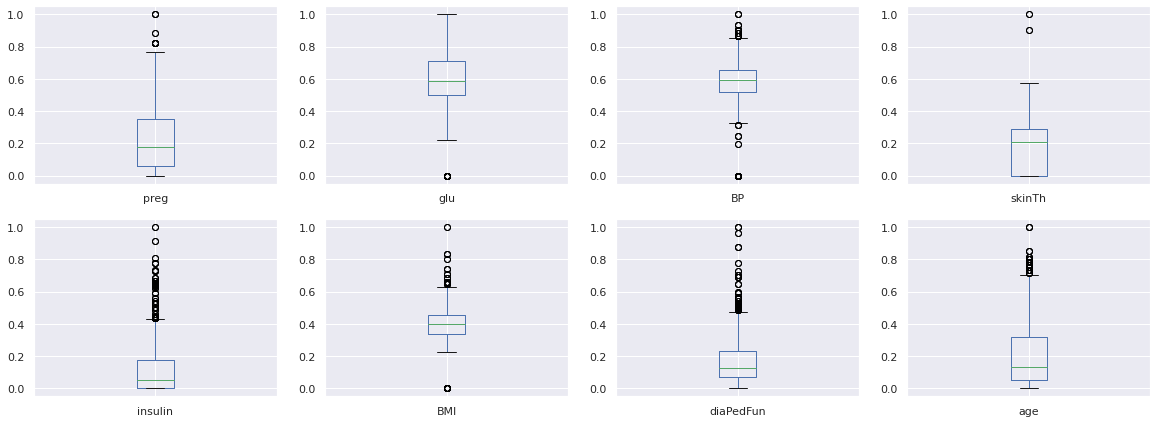

In [325]:
## BOXPLOT for checking the outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

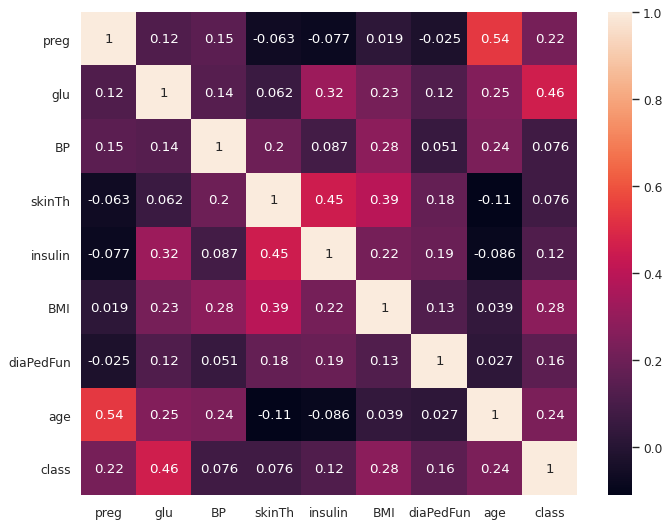

In [326]:
#### checking the correlation in matrix for variables using HEATMAP

plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(originalDf.corr(), annot=True)

In [327]:
## Function to calculate Eucledian Distance

def dist(plist1, plist2):
  return math.sqrt( (plist1[0] - plist2[0])**2 + (plist1[1] - plist2[1])**2 + (plist1[2] - plist2[2])**2 + (plist1[3] - plist2[3])**2 + (plist1[4] - plist2[4])**2 + (plist1[5] - plist2[5])**2 + (plist1[6] - plist2[6])**2 + (plist1[7] - plist2[7])**2) 

In [328]:
begin = time.time();  #timer start

In [329]:
## To find Xmin data point ---> data point with minimumt distance from origin

origin = pd.Series([0,0,0,0,0,0,0,0])
rows, columns = df.shape

df['dFromOrigin'] = 0   ## Adding attribute/Column 'dFromOrigin' to the dataframe

for i in range (rows):
  df['dFromOrigin'].iloc[i] = dist(origin, df.iloc[i])

XminRow = df[df['dFromOrigin'] == df.dFromOrigin.min()]  ## Xmin data point (row)
del XminRow['dFromOrigin']

XminRow

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
81,0.117647,0.371859,0.0,0.0,0.0,0.0,0.010248,0.016667
1902,0.117647,0.371859,0.0,0.0,0.0,0.0,0.010248,0.016667


In [330]:
## To find Xmax data point   ----->   data point with maximum distance from Xmin data point

df['dFromXmin'] = 0

for i in range (rows):
  df['dFromXmin'].iloc[i] = dist(XminRow.iloc[0], df.iloc[i])

XmaxRow = df[df['dFromXmin'] == df.dFromXmin.max()]  ## Xmax data point (row)
del XmaxRow['dFromOrigin']
del XmaxRow['dFromXmin']

XmaxRow

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
228,0.235294,0.98995,0.57377,0.354545,1.0,0.455335,0.961144,0.166667
1386,0.235294,0.98995,0.57377,0.354545,1.0,0.455335,0.961144,0.166667


In [331]:
## Adding distance of data points from Xmax data point to the dataset 

df['dFromXmax'] = 0

for i in range (rows):
  df['dFromXmax'].iloc[i] = dist(XmaxRow.iloc[0], df.iloc[i])

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,1.102833,0.900247,1.436653
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333,0.983719,0.896552,1.379875
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,0.956546,0.717768,1.453786
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,1.150012,0.983015,1.147170
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,1.264122,1.101443,0.928973


In [332]:
## Forming Clusters

df['class'] = 0

for i in range (rows):
  if ( (df.dFromXmin.iloc[i] < df.dFromXmax.iloc[i]) ) :
    df['class'].iloc[i] = 0
  else : df['class'].iloc[i] = 1

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax,class
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,1.102833,0.900247,1.436653,0
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333,0.983719,0.896552,1.379875,0
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,0.956546,0.717768,1.453786,0
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,1.150012,0.983015,1.147170,0
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,1.264122,1.101443,0.928973,1


In [333]:
end = time.time(); #end time

print(f"Total runtime of the program is {end - begin} seconds.")

Total runtime of the program is 2.822871446609497 seconds.


In [334]:
## Cluster 1

df[df['class'] == 1].shape

(179, 12)

In [335]:
## Cluster 0

df[df['class'] == 0].shape

(1821, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


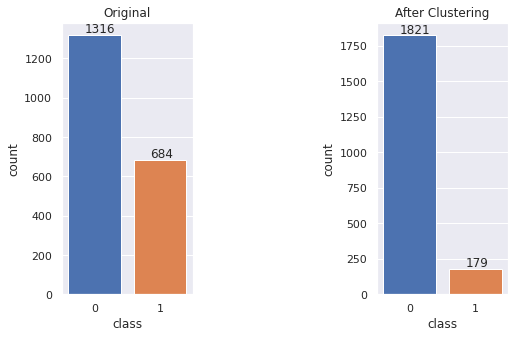

In [336]:
plt.figure(figsize=(8,5))

## Plot 1
plt.subplot(1,3,1)
p1 = sns.countplot(originalDf['class'], saturation=1)
plt.title('Original')
plotBarCount(p1)

## Plot 2
plt.subplot(1,3,3)
p2 = sns.countplot(df['class'], saturation=1)
plt.title('After Clustering')
plotBarCount(p2)

In [337]:
from sklearn.naive_bayes import GaussianNB
 
df2 = df.copy()

## some formatting
del df2['dFromOrigin']
del df2['dFromXmin']
del df2['dFromXmax']

In [338]:
df3 = df2.copy()
df4 = df2.copy()
del df3['class']
df3['class'] = originalDf['class']
df3

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,1
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333,0
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,1
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,1
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,0
...,...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000,0
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000,1
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000,0
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333,1


In [339]:
 ## Eliminating wrongly clustered tuples
 
for i in range(rows):
  if (df2['class'].iloc[i] == df3['class'].iloc[i]):
    df4 = df4.drop(labels=i, axis=0)
    
df4

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,0
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,0
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,0
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,1
5,0.000000,0.869347,0.639344,0.290909,0.356183,0.576923,0.461571,0.616667,1
...,...,...,...,...,...,...,...,...,...
1986,0.352941,0.522613,0.606557,0.163636,0.209677,0.370968,0.274979,0.333333,0
1991,0.352941,0.512563,0.672131,0.000000,0.000000,0.382134,0.043553,0.250000,0
1992,0.352941,0.673367,0.573770,0.209091,0.174731,0.439206,0.198121,0.133333,0
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000,0


In [340]:
## Class 0

df4[df4['class'] == 0].shape

(560, 9)

In [341]:
##Class 1

df4[df4['class'] == 1].shape

(55, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


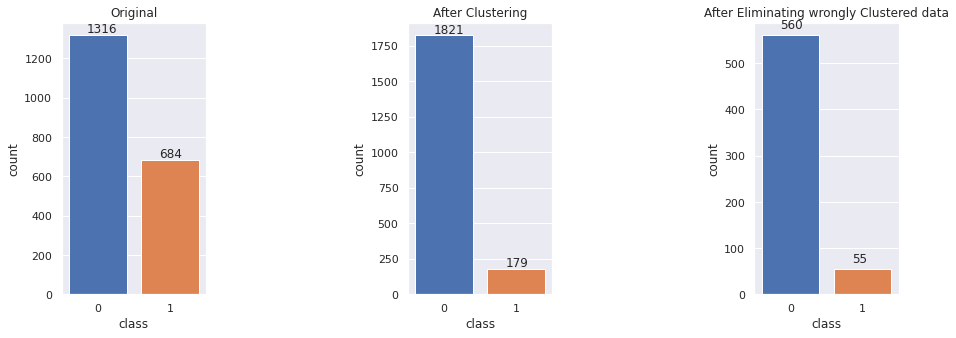

In [342]:
plt.figure(figsize=(15,5))

## Plot 1
plt.subplot(1,5,1)
p1 = sns.countplot(originalDf['class'], saturation=1)
plt.title('Original')
plotBarCount(p1)

## Plot 2
plt.subplot(1,5,3)
p2 = sns.countplot(df2['class'], saturation=1)
plt.title('After Clustering')
plotBarCount(p2)

## Plot 3
plt.subplot(1,5,5)
p3 = sns.countplot(df4['class'], saturation=1)
plt.title('After Eliminating wrongly Clustered data')
plotBarCount(p3)

In [343]:
# Splitting test and train datasets

from sklearn.model_selection import train_test_split

inputs = df4.drop('class', axis=1)
target = df4['class']

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, shuffle=False)

# X_train  ---> Training data without class label
# y_train  ---> Training class labels of X_train

# X_test  ---> Testing data without class label
# y_test  ---> Testing class labels of X_test

In [344]:
## Dimentions of X_train, X_test, y_train, y_test

print("X_train:", X_train.shape, '\tX_test:', X_test.shape, "\ty_train:", y_train.shape, '\ty_test:', X_test.shape)

X_train: (430, 8) 	X_test: (185, 8) 	y_train: (430,) 	y_test: (185, 8)


In [345]:
## Importing GaussianNB model

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [346]:
## Building the model

model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [347]:
## Model accuracy

model.score(X_test,y_test)

0.9621621621621622

In [348]:
## Selecting a small part of X_test (first 10 in this case)

X_test[0:10]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
1395,0.000000,0.899497,0.737705,0.245455,0.000000,0.547146,0.259607,0.033333
1396,0.529412,0.824121,0.688525,0.190909,0.000000,0.382134,0.321520,0.183333
1400,0.176471,0.698492,0.442623,0.000000,0.000000,0.317618,0.138343,0.016667
1401,0.352941,0.597990,0.409836,0.200000,0.236559,0.336228,0.529462,0.200000
1405,0.000000,0.829146,0.737705,0.300000,0.913978,0.648883,0.149018,0.033333
1412,0.705882,0.462312,0.508197,0.063636,0.346774,0.342432,0.362084,0.383333
1413,0.058824,0.567839,0.524590,0.318182,0.000000,0.416873,0.198548,0.000000
1416,0.058824,0.969849,0.409836,0.145455,0.504032,0.321340,0.246371,0.050000
1419,0.176471,0.708543,0.000000,0.000000,0.000000,0.372208,0.291631,0.100000
1422,0.235294,0.618090,0.508197,0.000000,0.000000,0.397022,0.063194,0.233333


In [349]:
## Selecting a small part of y_test (first 10 in this case)

y_test[0:10]

1395    0
1396    0
1400    0
1401    0
1405    1
1412    0
1413    0
1416    1
1419    0
1422    0
Name: class, dtype: int64

In [350]:
 ## Predicting class labels of given input data
 
 model.predict(X_test[0:10])

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [351]:
model.predict_proba(X_test[0:10])

array([[9.01898628e-01, 9.81013715e-02],
       [9.89133214e-01, 1.08667860e-02],
       [9.99915002e-01, 8.49978408e-05],
       [9.36162211e-01, 6.38377891e-02],
       [2.18656299e-12, 1.00000000e+00],
       [9.99075652e-01, 9.24347834e-04],
       [9.95476311e-01, 4.52368927e-03],
       [1.88805420e-01, 8.11194580e-01],
       [1.00000000e+00, 1.05888653e-10],
       [9.99925062e-01, 7.49375586e-05]])

In [352]:
truth = y_test
prediction =  model.predict(X_test)
predicProbabilities = model.predict_proba(X_test)

print(classification_report(truth, prediction, target_names=['Diabetic', 'Non-Diabetic']))

# The precision will be "how many are correctly classified among that class" -----> minimizing false psitives
# The recall means "how many of this class you find over the whole number of element of this class" -----> minimizing false negatives
# The f1-score is the harmonic mean between precision & recall
# The support is the number of occurence of the given class in your dataset (so you have 24 of class 0 and 139 of class 1)

# Macro-averaged: all classes equally contribute to the average
# Weighted-average: each classes's contribution to the average is weighted by its size

              precision    recall  f1-score   support

    Diabetic       0.98      0.98      0.98       164
Non-Diabetic       0.85      0.81      0.83        21

    accuracy                           0.96       185
   macro avg       0.91      0.90      0.90       185
weighted avg       0.96      0.96      0.96       185



In [353]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

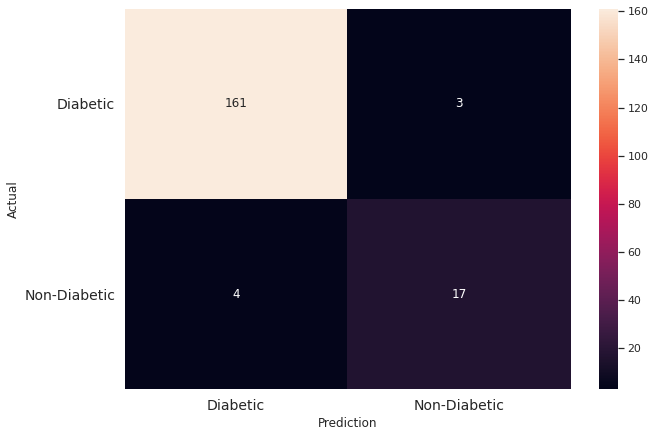

In [354]:
## Printing Confusion Matrix

cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Diabetic","Non-Diabetic"])

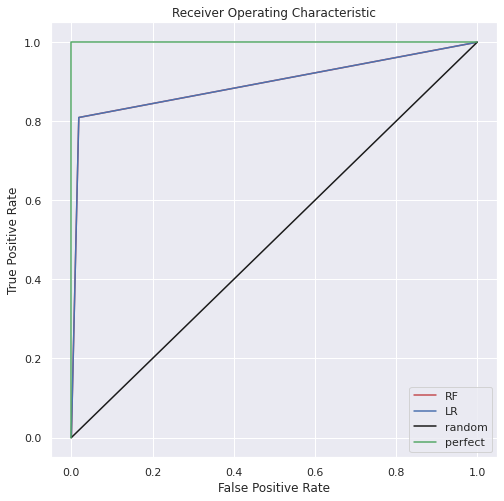

In [355]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(truth, prediction)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(truth, prediction)

plt.figure(figsize=(8,8))
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

0.8956155632984901


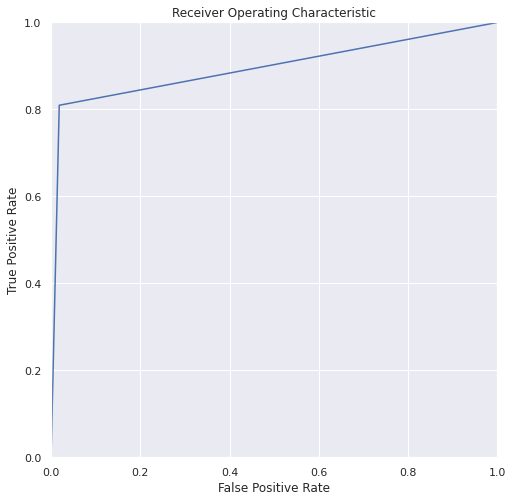

In [356]:
#checking roc and auc curves
from sklearn.metrics import roc_curve, auc
fpr,tpr,_=roc_curve(truth, prediction)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

Text(0.5, 0, 'Feature Importance')

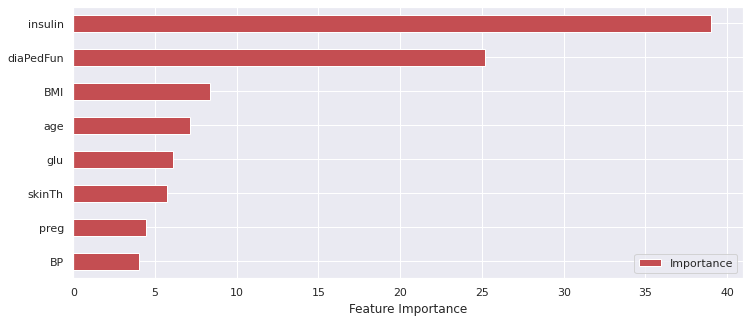

In [357]:
## Checking for top 3 most important features in the given dataset

from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1)
randomForestModel.fit(X_train, y_train)

Importance = pd.DataFrame({'Importance':randomForestModel.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize=(12,5))
plt.xlabel('Feature Importance')
# plt.gca().legend_ = None

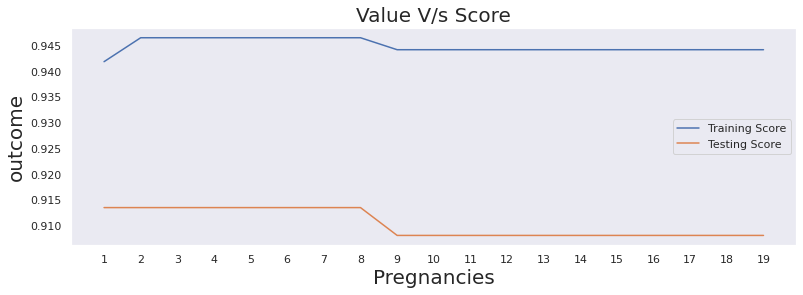


Best score is 0.9135135135135135 with K = 1


In [358]:
from sklearn.neighbors import KNeighborsClassifier

neig = np.arange(1, 20)
train_score_knn=[]
test_score_knn=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski')
    knn.fit(X_train, y_train)
    train_score_knn.append(knn.score(X_train, y_train))
    test_score_knn.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,4])
plt.plot(neig, train_score_knn, label = 'Training Score')
plt.plot(neig, test_score_knn, label = 'Testing Score')
plt.legend()
plt.title('Value V/s Score',fontsize=20)
plt.xlabel('Pregnancies',fontsize=20)
plt.ylabel('outcome',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("\nBest score is {} with K = {}".format(np.max(test_score_knn),1+test_score_knn.index(np.max(test_score_knn))))